In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

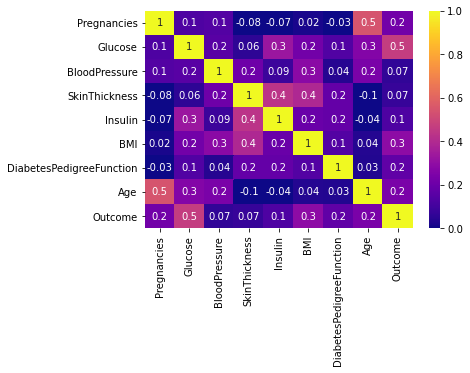

In [18]:
# Visually evaluate the correlation¶
#sns.heatmap(df.corr(),annot=True,map='plasma')
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=0, vmax=1, cmap='plasma')

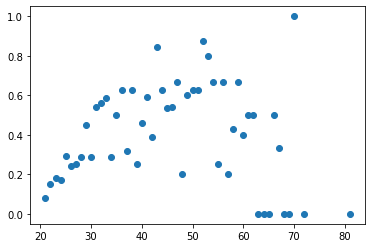

In [28]:
#Now let's check how each column affects the disease
plt.scatter(df.sort_values('Age')['Age'].unique(),df.groupby('Age').mean()['Outcome'])

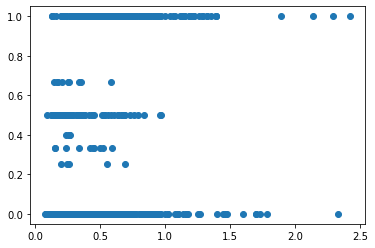

In [29]:
plt.scatter(df.sort_values("DiabetesPedigreeFunction")['DiabetesPedigreeFunction'].unique(),df.groupby('DiabetesPedigreeFunction').mean()['Outcome'])

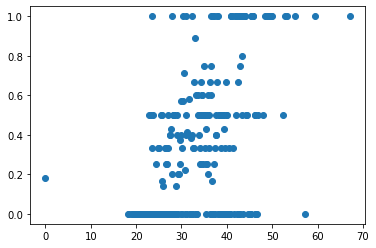

In [30]:
plt.scatter(df.sort_values("BMI")['BMI'].unique(),df.groupby('BMI').mean()['Outcome'])
plt.show()

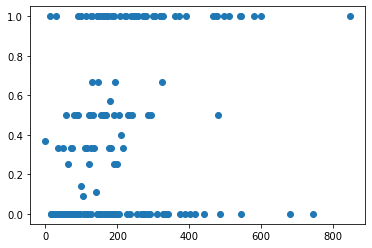

In [31]:
plt.scatter(df.sort_values('Insulin')['Insulin'].unique(), df.groupby('Insulin').mean()['Outcome'])
plt.show()

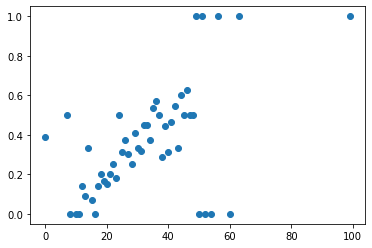

In [32]:
plt.scatter(df.sort_values('SkinThickness')['SkinThickness'].unique(), df.groupby('SkinThickness').mean()['Outcome'])
plt.show()

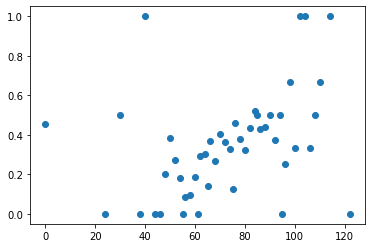

In [34]:
plt.scatter(df.sort_values('BloodPressure')['BloodPressure'].unique(), df.groupby('BloodPressure').mean()['Outcome'])
plt.show()

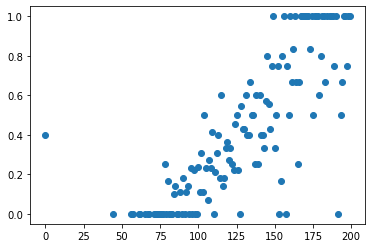

In [35]:
plt.scatter(df.sort_values('Glucose')['Glucose'].unique(), df.groupby('Glucose').mean()['Outcome'])
plt.show()


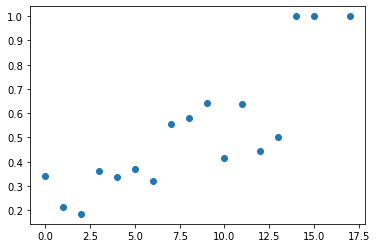

In [36]:
plt.scatter(df.sort_values('Pregnancies')['Pregnancies'].unique(), df.groupby('Pregnancies').mean()['Outcome'])
plt.show()

#### It is obvious that Insulin, BMI and DiabetesPedigreeFunction do not correlate with the disease

# Let's start predicting the data


In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
y = df['Outcome'].values
x = df.drop(['Outcome','Insulin','BMI','DiabetesPedigreeFunction'],axis=1).values


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [54]:
result = {}

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [56]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
result['LogisticRegression'] = LR.score(x_test,y_test)

In [59]:
RF = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
RF.fit(x_train, y_train)
result['RandomForestClassifier'] = RF.score(x_test,y_test)

In [60]:
NN = MLPClassifier(hidden_layer_sizes=(18,), random_state=1, max_iter=1000)
NN.fit(x_train, y_train)
result['MLPClassifier'] = NN.score(x_test,y_test)

In [61]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
result['GaussianNB'] = GNB.score(x_test,y_test)

In [62]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
result['DecisionTreeClassifier'] = DTC.score(x_test,y_test)

In [63]:
result

{'LogisticRegression': 0.7922077922077922,
 'RandomForestClassifier': 0.7337662337662337,
 'MLPClassifier': 0.7402597402597403,
 'GaussianNB': 0.7662337662337663,
 'DecisionTreeClassifier': 0.7207792207792207}

In [64]:
from tabulate import tabulate

In [65]:
result = dict(sorted(result.items(), key=lambda x: x[1], reverse=True))
print(tabulate(result.items(), headers=['NAME', 'VALUE'], tablefmt="grid"))

+------------------------+----------+
| NAME                   |    VALUE |
+========================+==========+
| LogisticRegression     | 0.792208 |
+------------------------+----------+
| GaussianNB             | 0.766234 |
+------------------------+----------+
| MLPClassifier          | 0.74026  |
+------------------------+----------+
| RandomForestClassifier | 0.733766 |
+------------------------+----------+
| DecisionTreeClassifier | 0.720779 |
+------------------------+----------+
